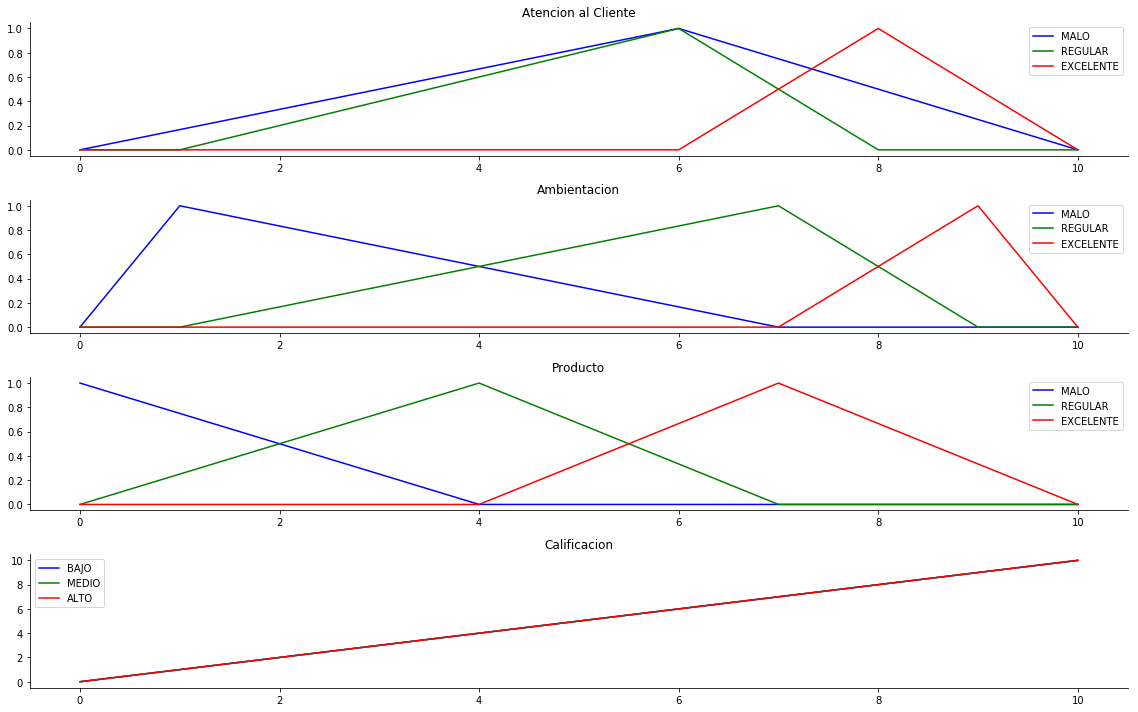

In [135]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

Atencion_cliente = np.arange(0, 11, 1)
Ambientación = np.arange(0, 11, 1)
Producto = np.arange(0, 11, 1)
Calificacion  = np.arange(0, 11, 1)

Conocimiento_bajo = fuzz.trimf(Atencion_cliente, [0, 0, 5])
Conocimiento_medio = fuzz.trimf(Atencion_cliente, [0, 5, 8])
Conocimiento_alto = fuzz.trimf(Atencion_cliente, [5, 8, 10])
Disposición_bajo = fuzz.trimf(Atencion_cliente, [0, 0, 5])
Disposición_nedio = fuzz.trimf(Atencion_cliente, [0, 5, 8])
Disposición_alto = fuzz.trimf(Atencion_cliente, [5, 8, 10])
Presentacion_personal_bajo = fuzz.trimf(Atencion_cliente, [0, 0, 5])
Presentacion_personal_medio = fuzz.trimf(Atencion_cliente, [0, 5, 8])
Presentacion_personal_alto = fuzz.trimf(Atencion_cliente, [5, 8, 10])


Limpieza_bajo = fuzz.trimf(Ambientación, [0, 0, 7])
Limpieza_medio = fuzz.trimf(Ambientación, [0, 7, 8])
Limpieza_alto = fuzz.trimf(Ambientación, [7, 8, 10])
Iluminación_bajo = fuzz.trimf(Ambientación, [0, 0, 8])
Iluminación_medio = fuzz.trimf(Ambientación, [0, 7, 8])
Iluminación_alto = fuzz.trimf(Ambientación, [7, 8, 10])
Seg_fisica_bajo = fuzz.trimf(Ambientación, [0, 0, 7])
Seg_fisica_medio = fuzz.trimf(Ambientación, [0, 7, 8])
Seg_fisica_alto = fuzz.trimf(Ambientación, [7, 8, 10])

Disponibilidad_bajo = fuzz.trimf(Producto, [0, 0, 4])
Disponibilidad_medio = fuzz.trimf(Producto, [0, 4, 7])
Disponibilidad_alto = fuzz.trimf(Producto, [4, 7, 10])
Precio_bajo = fuzz.trimf(Producto, [0, 0, 4])
Precio_medio = fuzz.trimf(Producto, [0, 4, 7])
Precio_alto = fuzz.trimf(Producto, [4, 7, 10])
Utilidad_bajo = fuzz.trimf(Producto, [0, 0, 4])
Utilidad_medio = fuzz.trimf(Producto, [0, 4, 7])
Utilidad_alto = fuzz.trimf(Producto, [4, 7, 10])

Atencion_cliente_bajo = fuzz.trimf(calificacion, [0, 0, 6])
Atencion_cliente_medio = fuzz.trimf(calificacion, [0, 6, 8])
Atencion_cliente_alto = fuzz.trimf(calificacion, [6, 8, 10])
Ambientación_bajo = fuzz.trimf(calificacion, [0, 0, 6])
Ambientación_medio = fuzz.trimf(calificacion, [0, 6, 8])
Ambientación_alto = fuzz.trimf(calificacion, [6, 8, 10])
Producto_bajo = fuzz.trimf(calificacion, [0, 0, 6])
Producto_medio = fuzz.trimf(calificacion, [0, 6, 8])
Producto_alto = fuzz.trimf(calificacion, [6, 8, 10])


fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(16, 10))

ax0.plot(Atencion_cliente, Conocimiento, 'b', linewidth=1.5, label='MALO')
ax0.plot(Atencion_cliente, Disposición, 'g', linewidth=1.5, label='REGULAR')
ax0.plot(Atencion_cliente, Presentacion_personal, 'r', linewidth=1.5, label='EXCELENTE')
ax0.set_title('Atencion al Cliente')
ax0.legend()

ax1.plot(Ambientación, Limpieza, 'b', linewidth=1.5, label='MALO')
ax1.plot(Ambientación, Iluminación, 'g', linewidth=1.5, label='REGULAR')
ax1.plot(Ambientación, Seg_fisica, 'r', linewidth=1.5, label='EXCELENTE')
ax1.set_title('Ambientacion')
ax1.legend()

ax2.plot(Producto, Disponibilidad_bajo, 'b', linewidth=1.5, label='MALO')
ax2.plot(Producto, Disponibilidad_medio, 'g', linewidth=1.5, label='REGULAR')
ax2.plot(Producto, Disponibilidad_alto, 'r', linewidth=1.5, label='EXCELENTE')
ax2.set_title('Producto')
ax2.legend()

ax3.plot(Calificacion, Atencion_cliente, 'b', linewidth=1.5, label='BAJO')
ax3.plot(Calificacion, Ambientación, 'g', linewidth=1.5, label='MEDIO')
ax3.plot(Calificacion, Producto, 'r', linewidth=1.5, label='ALTO')
ax3.set_title('Calificacion')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

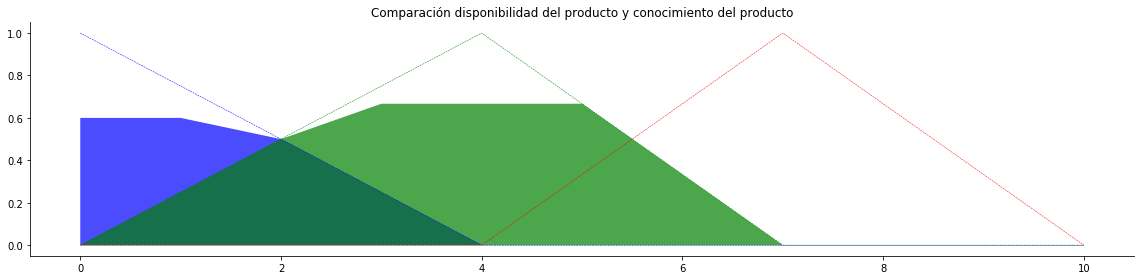

In [136]:
Conocimiento_B = fuzz.interp_membership(Atencion_cliente, Conocimiento_bajo, 2)
Conocimiento_M = fuzz.interp_membership(Atencion_cliente, Conocimiento_medio, 7)
Conocimiento_A = fuzz.interp_membership(Atencion_cliente, Conocimiento_alto, 10)

Disponibilidad_B = fuzz.interp_membership(Producto, Disponibilidad_bajo, 3)
Disponibilidad_M = fuzz.interp_membership(Producto, Disponibilidad_medio, 5)
Disponibilidad_A = fuzz.interp_membership(Producto, Disponibilidad_alto, 10)

Regla_1 = np.fmax(Conocimiento_B, Disponibilidad_B)

DispBajo = np.fmin(Regla_1, Disponibilidad_bajo)  

DispMedio = np.fmin(Disponibilidad_M, Disponibilidad_medio)

Regla_3 = np.fmax(Conocimiento_A, Disponibilidad_A)
DispAlto = np.fmin(Regla_3, Disponibilidad_alto)
tip0 = np.zeros_like(Producto)

fig, ax0 = plt.subplots(figsize=(16, 4))

ax0.fill_between(Producto, tip0, DispBajo, facecolor='b', alpha=0.7)
ax0.plot(Producto, Disponibilidad_bajo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(Producto, tip0, DispMedio, facecolor='g', alpha=0.7)
ax0.plot(Producto, Disponibilidad_medio, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(Producto, tip0, DispAlto, facecolor='r', alpha=0.7)
ax0.plot(Producto, Disponibilidad_alto, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Comparación disponibilidad del producto y conocimiento del producto')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

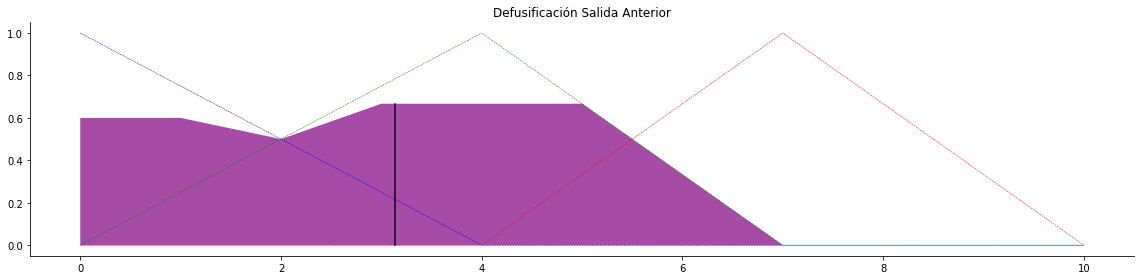

In [137]:

Agrupar1 = np.fmax(DispBajo,
                     np.fmax(DispMedio, DispAlto))
Producto_Disponible = fuzz.defuzz(Producto, Agrupar1, 'centroid')
PD = fuzz.interp_membership(Producto, Agrupar1, Producto_Disponible)  


fig, ax0 = plt.subplots(figsize=(16, 4))

ax0.plot(Producto, Disponibilidad_bajo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(Producto, Disponibilidad_medio, 'g', linewidth=0.5, linestyle='--')
ax0.plot(Producto, Disponibilidad_alto, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(Producto, tip0, Agrupar1, facecolor='Purple', alpha=0.7)
ax0.plot([Producto_Disponible, Producto_Disponible], [0, PD], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Defusificación Salida Anterior')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

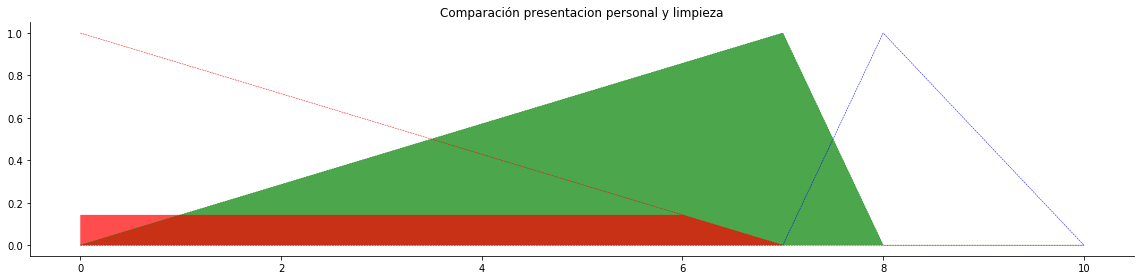

In [138]:
Presentacion_personal_B = fuzz.interp_membership(Atencion_cliente, Presentacion_personal_bajo, 5)
Presentacion_personal_M = fuzz.interp_membership(Atencion_cliente, Presentacion_personal_medio, 7)
Presentacion_personal_A = fuzz.interp_membership(Atencion_cliente, Presentacion_personal_alto, 10)

Limpieza_B = fuzz.interp_membership(Ambientación, Limpieza_bajo, 6)
Limpieza_M = fuzz.interp_membership(Ambientación, Limpieza_medio, 7)
Limpieza_A = fuzz.interp_membership(Ambientación, Limpieza_alto, 10)


Regla_4 = np.fmax(Presentacion_personal_A, Limpieza_A)

LimpAlto = np.fmin(Regla_4, Limpieza_alto) 


LimpMedio = np.fmin(Limpieza_M, Limpieza_medio)

Regla_5 = np.fmax(Presentacion_personal_B, Limpieza_B)
LimpBajo = np.fmin(Regla_5, Limpieza_bajo)
tip1 = np.zeros_like(Ambientación)

# Visualize this
fig, ax1 = plt.subplots(figsize=(16, 4))

ax1.fill_between(Ambientación, tip1, LimpAlto, facecolor='b', alpha=0.7)
ax1.plot(Ambientación, Limpieza_alto, 'b', linewidth=0.5, linestyle='--', )
ax1.fill_between(Ambientación, tip1, LimpMedio, facecolor='g', alpha=0.7)
ax1.plot(Ambientación, Limpieza_medio, 'g', linewidth=0.5, linestyle='--')
ax1.fill_between(Ambientación, tip1, LimpBajo, facecolor='r', alpha=0.7)
ax1.plot(Ambientación, Limpieza_bajo, 'r', linewidth=0.5, linestyle='--')
ax1.set_title('Comparación presentacion personal y limpieza')

for ax in (ax1,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

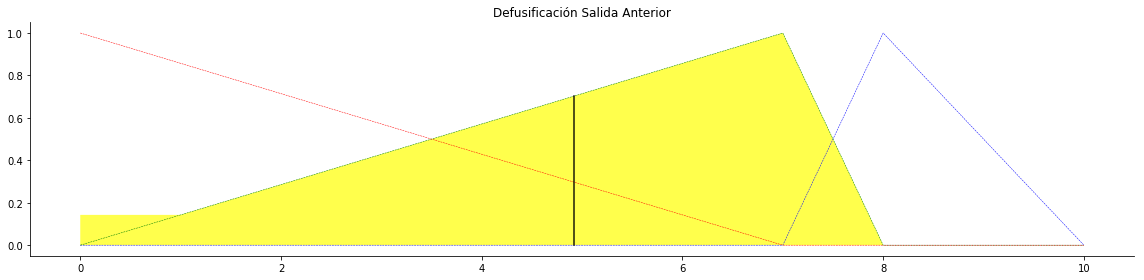

In [139]:
Agrupar2 = np.fmax(LimpAlto,
                     np.fmax(LimpMedio, LimpBajo))
Lugar_Limpio = fuzz.defuzz(Ambientación, Agrupar2, 'centroid')
LL = fuzz.interp_membership(Ambientación, Agrupar2, Lugar_Limpio)  

fig, ax1 = plt.subplots(figsize=(16, 4))

ax1.plot(Ambientación, Limpieza_alto, 'b', linewidth=0.5, linestyle='--', )
ax1.plot(Ambientación, Limpieza_medio, 'g', linewidth=0.5, linestyle='--')
ax1.plot(Ambientación, Limpieza_bajo, 'r', linewidth=0.5, linestyle='--')
ax1.fill_between(Ambientación, tip1, Agrupar2, facecolor='yellow', alpha=0.7)
ax1.plot([Lugar_Limpio, Lugar_Limpio], [0, LL], 'k', linewidth=1.5, alpha=0.9)
ax1.set_title('Defusificación Salida Anterior')

for ax in (ax1,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()